# 1. Understanding the Dataset

### 1.1. Feature description

## setup

In [170]:
import sys

# Scikit-Learn
import sklearn

# Common imports
import numpy as np
import pandas as pd
import numpy as np
import seaborn as sns

# To plot
import matplotlib as mpl
import matplotlib.pyplot as plt

In [171]:
df = pd.read_csv('/Users/tairakhayev/Downloads/final_project_dataset_complete.csv')
df_raw=pd.read_csv('/Users/tairakhayev/Downloads/final_project_dataset_complete.csv')

In [172]:
df.shape

(9000, 11)

In [173]:
df.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,category_1,category_2,target
0,0.496714,1.146509,-0.648521,0.833005,0.784920,-2.209437,-1.300105,-2.242241,Above Average,Region C,1
1,-0.138264,-0.061846,NaN,0.403768,0.704674,-2.498565,-1.339227,-1.942298,Below Average,Region A,0
2,0.647689,1.395115,-0.764126,1.708266,-0.250029,1.956259,1.190238,1.503559,High,Region C,1
3,1.523030,2.657560,-2.461653,2.649051,0.882201,3.445638,2.120913,3.409035,High,Region B,1
4,-0.234153,-0.499391,0.576097,-0.441656,0.610601,0.211425,0.935759,-0.401463,Below Average,Region C,0


In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   feature_1   9000 non-null   float64
 1   feature_2   9000 non-null   float64
 2   feature_3   8600 non-null   float64
 3   feature_4   9000 non-null   float64
 4   feature_5   9000 non-null   float64
 5   feature_6   8500 non-null   float64
 6   feature_7   9000 non-null   float64
 7   feature_8   9000 non-null   float64
 8   category_1  9000 non-null   object 
 9   category_2  9000 non-null   object 
 10  target      9000 non-null   int64  
dtypes: float64(8), int64(1), object(2)
memory usage: 773.6+ KB


In [175]:
df.dtypes

feature_1     float64
feature_2     float64
feature_3     float64
feature_4     float64
feature_5     float64
feature_6     float64
feature_7     float64
feature_8     float64
category_1     object
category_2     object
target          int64
dtype: object

In [176]:
df.nunique()

feature_1     9000
feature_2     9000
feature_3     8600
feature_4     9000
feature_5     9000
feature_6     8500
feature_7     9000
feature_8     9000
category_1       4
category_2       3
target           2
dtype: int64

In [177]:
df.describe()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,target
count,9000.000000,9000.000000,8600.000000,9000.000000,9000.000000,8500.000000,9000.000000,9000.000000,9000.000000
mean,0.000427,0.003349,0.003235,-0.008481,-0.002177,-0.006447,0.000592,0.003348,0.475444
std,1.241318,2.508324,1.542901,2.061784,0.577415,1.981615,1.075064,2.043643,0.499424
min,-18.665400,-37.852816,-6.676680,-8.190124,-0.999791,-8.590782,-4.422265,-9.474989,0.000000
25%,-0.680062,-1.382610,-1.022085,-1.399928,-0.502614,-1.329040,-0.700078,-1.356620,0.000000
50%,-0.003938,-0.016698,0.005196,-0.019541,0.001695,-0.003137,-0.000097,-0.007584,0.000000
75%,0.680513,1.380228,1.038571,1.394151,0.497004,1.324897,0.731942,1.402024,1.000000
max,21.934496,47.603454,6.203055,8.189001,0.999914,6.803751,3.857219,7.572578,1.000000


In [178]:
df.columns.tolist()

['feature_1',
 'feature_2',
 'feature_3',
 'feature_4',
 'feature_5',
 'feature_6',
 'feature_7',
 'feature_8',
 'category_1',
 'category_2',
 'target']

# Description of dataset contents:
### Dataset size: 9000 rows and 11 columns.

### Features:
- feature_1 - feature_8: Numeric features (float64), some contain missing values.
- category_1 and category_2: Categorical features (object).
- target: Target feature (int64), binary (0 or 1).
### Missing values:
- feature_3: 8600 values ​​out of 9000.
- feature_6: 8500 values ​​out of 9000.

### 1.2. Data visualization

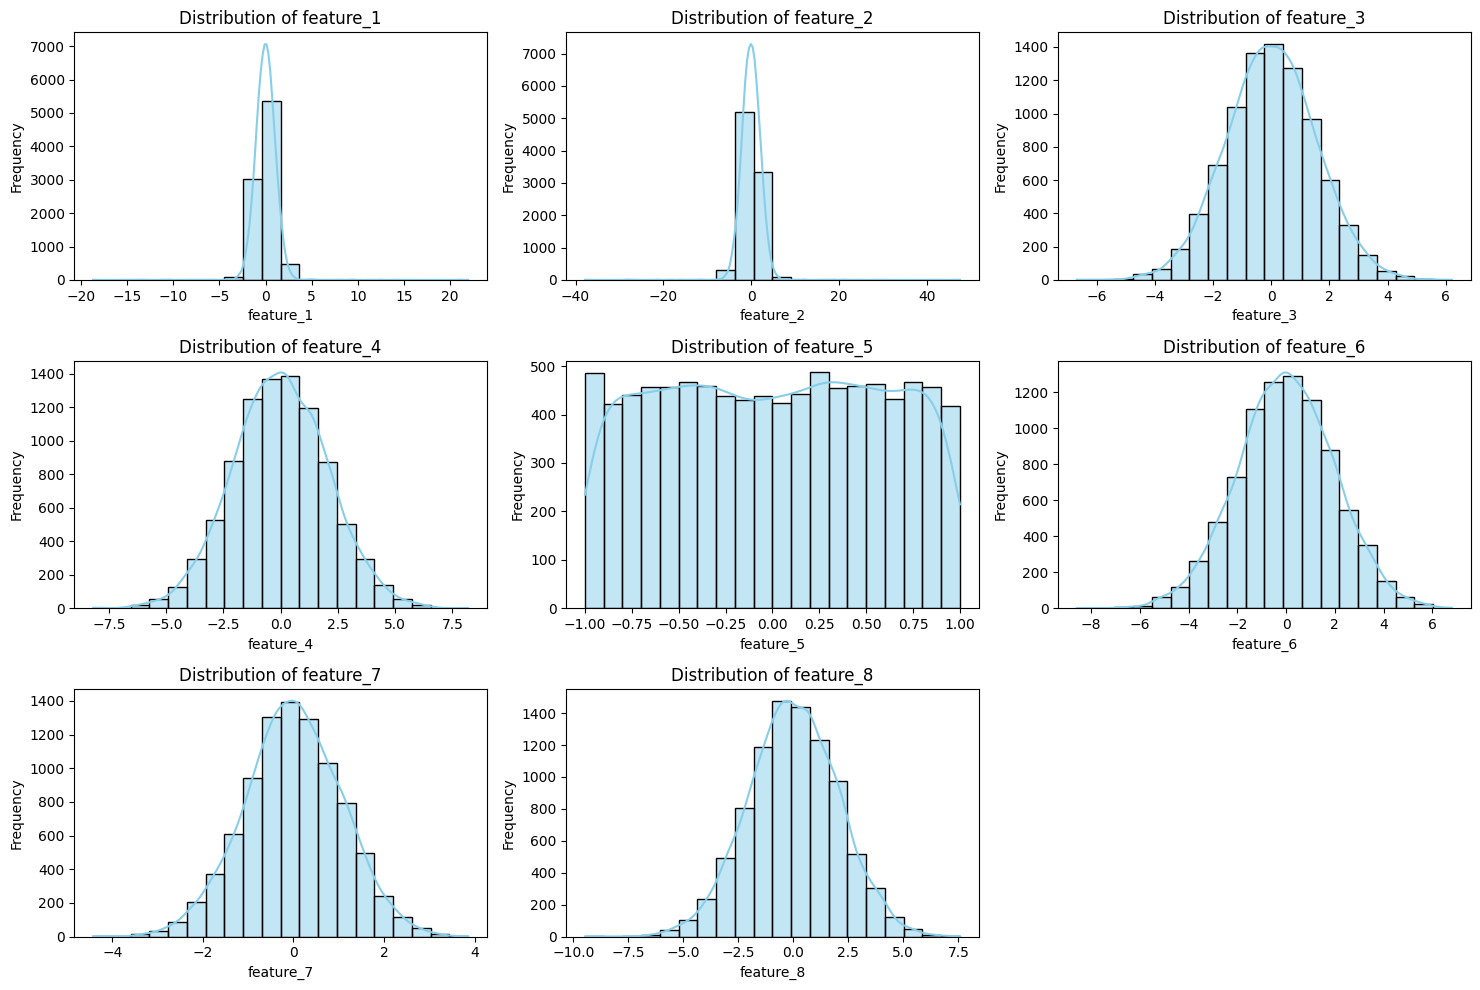

In [179]:

# Выбор числовых признаков из датасета
numerical_features = ['feature_1', 'feature_2', 'feature_3', 'feature_4', 
                      'feature_5', 'feature_6', 'feature_7', 'feature_8']

# Количество признаков
num_features = len(numerical_features)
num_cols = int(np.ceil(np.sqrt(num_features)))  # Определяем количество столбцов для сетки графиков
num_rows = int(np.ceil(num_features / num_cols))  # Определяем количество строк

# Создание фигуры и осей для подграфиков
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))
axes = axes.flatten()  # Преобразуем оси для упрощённого индексирования

# Построение гистограмм для каждого числового признака
for i, feature in enumerate(numerical_features):
    sns.histplot(df[feature], kde=True, bins=20, ax=axes[i], color='skyblue')
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')

# Скрытие неиспользуемых подграфиков
for i in range(num_features, len(axes)):
    fig.delaxes(axes[i])

# Настройка макета
plt.tight_layout()
plt.show()


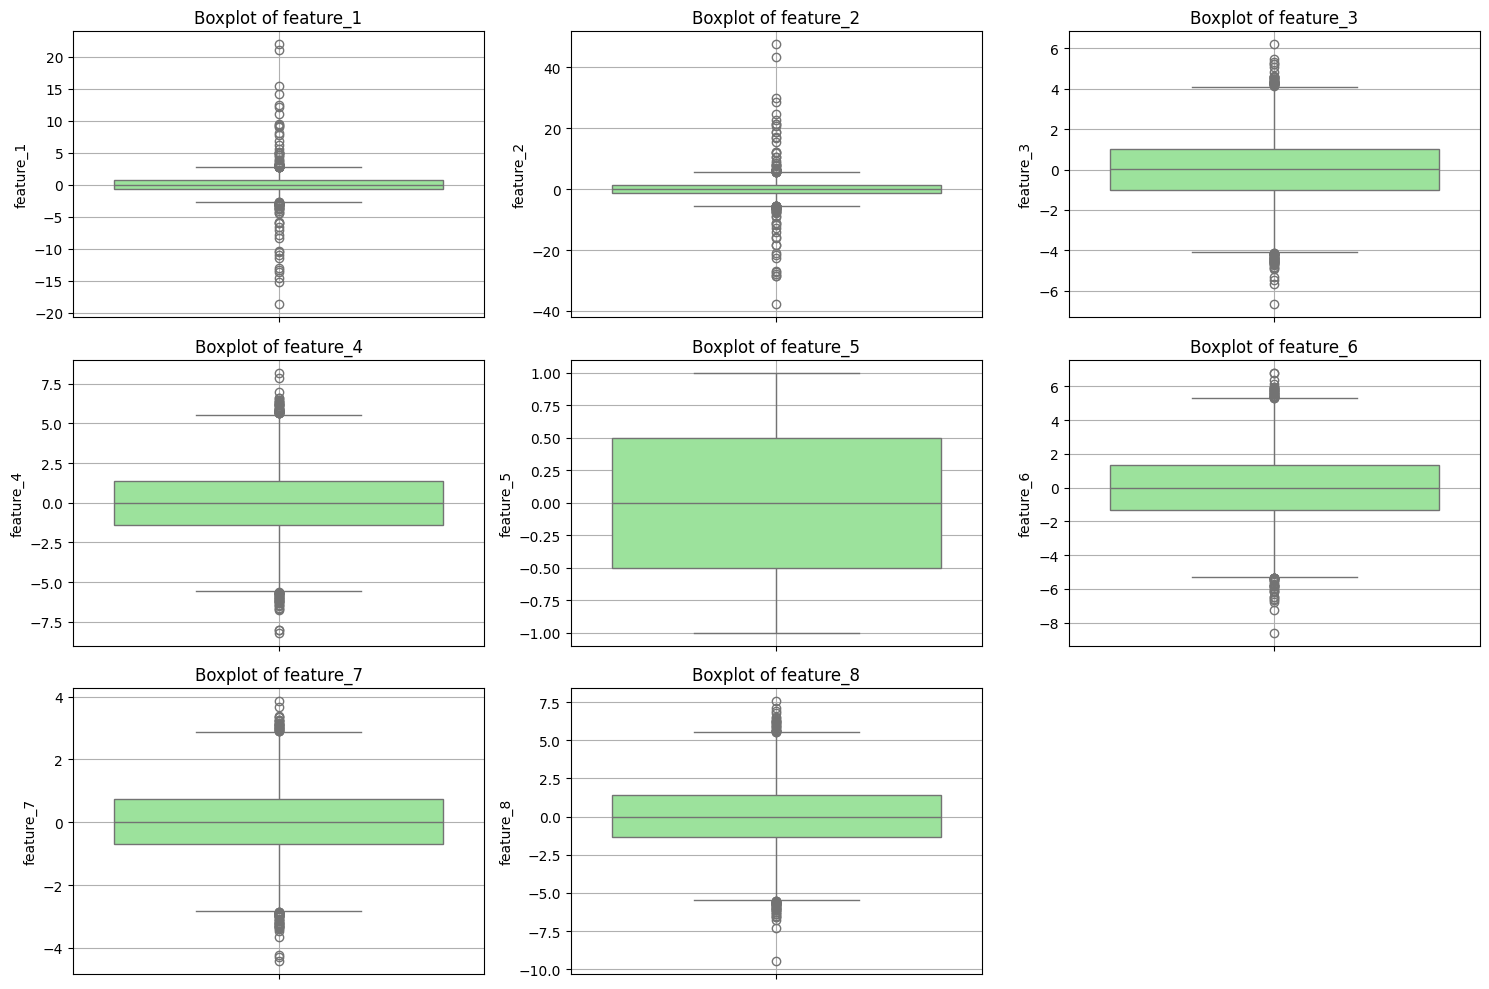

In [180]:
# Построение boxplot для числовых признаков
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))
axes = axes.flatten()  # Преобразуем оси для упрощённого индексирования

# Построение boxplot для каждого числового признака
for i, feature in enumerate(numerical_features):
    sns.boxplot(y=df[feature], ax=axes[i], color='lightgreen')
    axes[i].set_title(f'Boxplot of {feature}')
    axes[i].set_ylabel(feature)
    axes[i].grid(True)

# Скрытие неиспользуемых подграфиков
for i in range(num_features, len(axes)):
    fig.delaxes(axes[i])

# Настройка макета
plt.tight_layout()
plt.show()


### 1.3. Relationship analysis

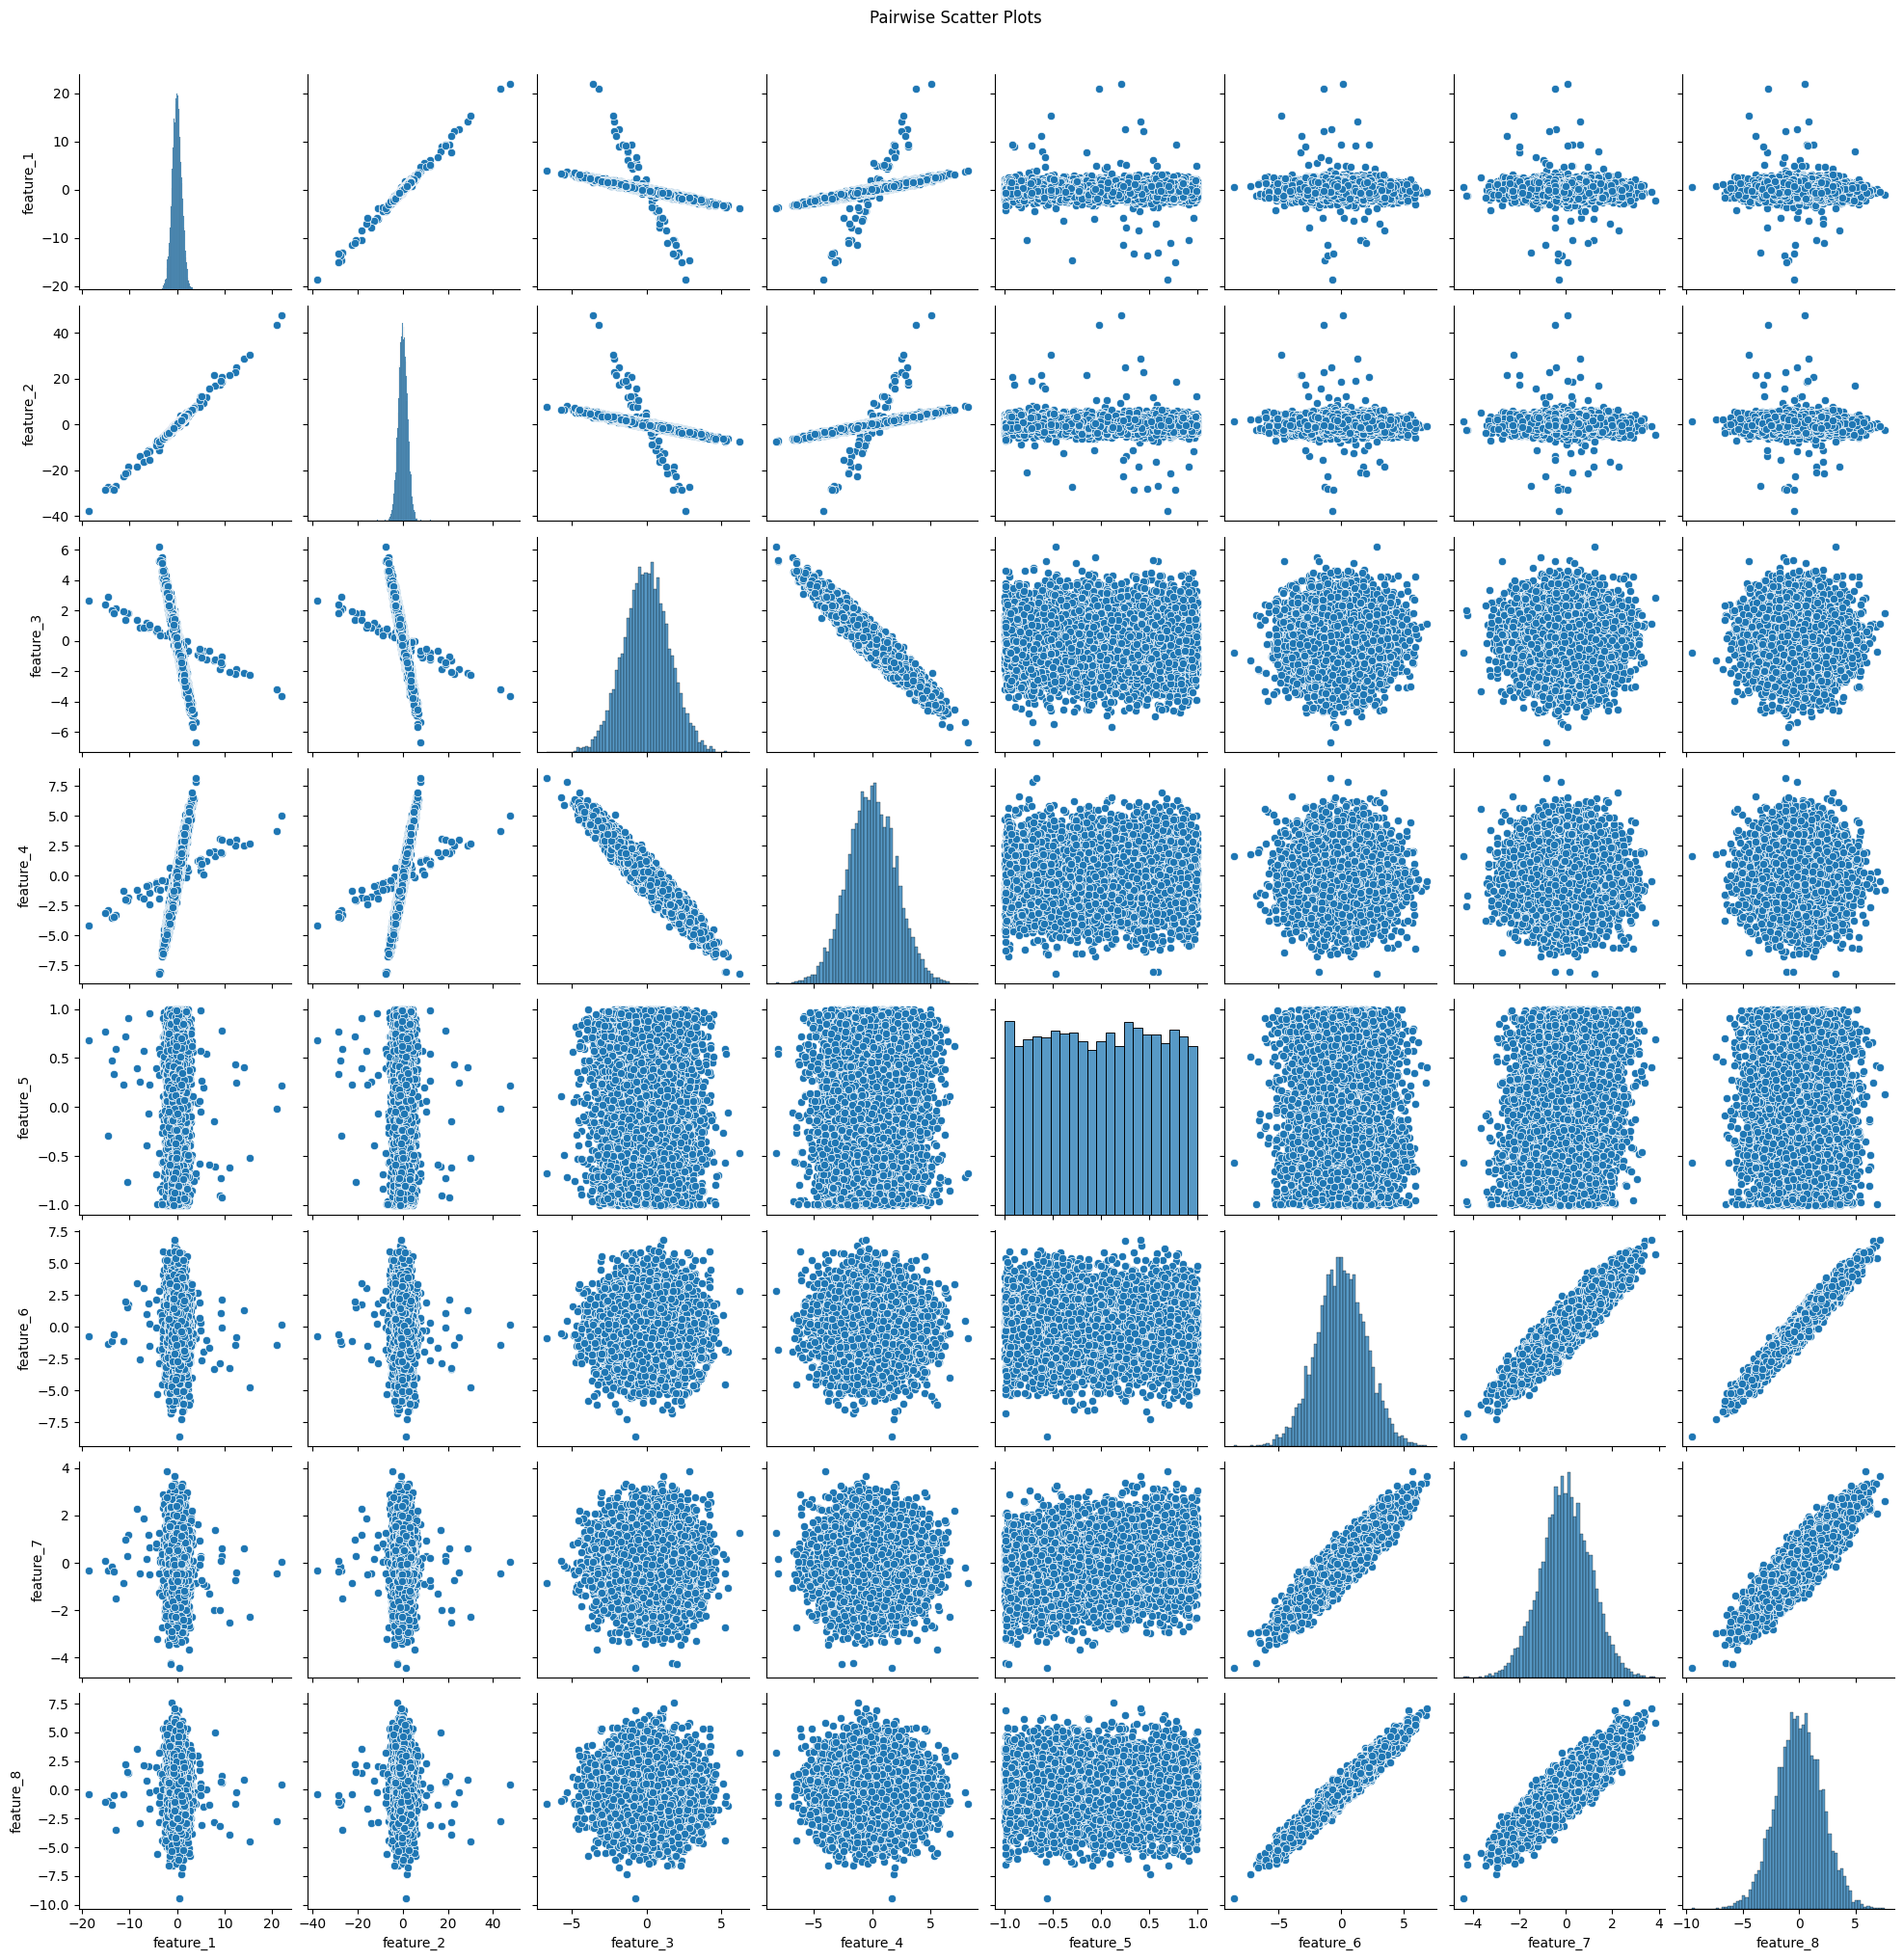

In [181]:
# Select a subset of features for scatter plot analysis
scatter_features = ['feature_1', 'feature_2', 'feature_3', 'feature_4','feature_5','feature_6','feature_7','feature_8']

# Plot scatter plots for selected features
sns.pairplot(df[scatter_features])
plt.suptitle('Pairwise Scatter Plots', y=1.02)
plt.show()

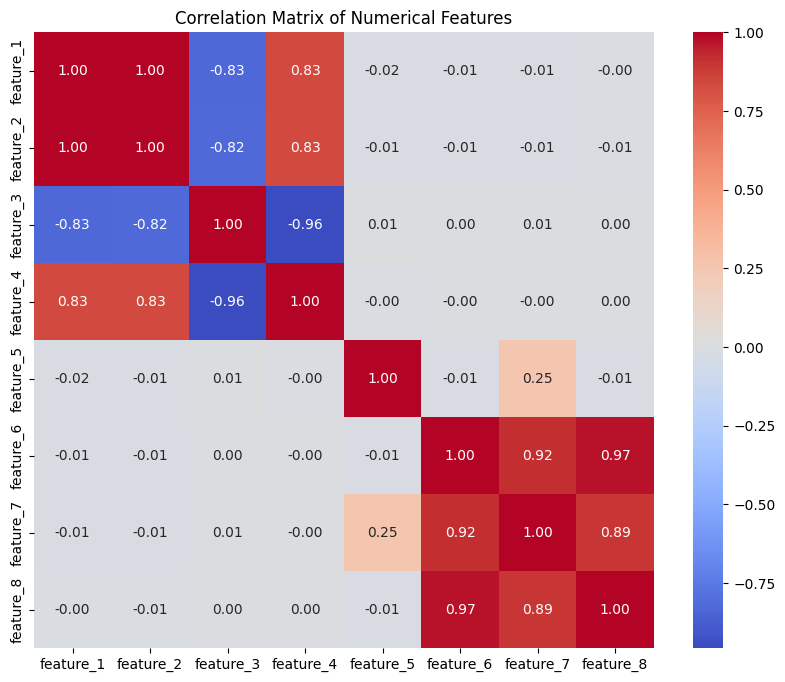

In [182]:
# Calculate the correlation matrix
correlation_matrix = df[numerical_features].corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

## 2. Data preprocessing 

### 2.1 Finding missing values

In [183]:
df.isnull().sum()

feature_1       0
feature_2       0
feature_3     400
feature_4       0
feature_5       0
feature_6     500
feature_7       0
feature_8       0
category_1      0
category_2      0
target          0
dtype: int64

In [184]:
# Доля недостающих значений
missing_percentage = (df.isnull().sum() / len(df)) * 100
print("\nPercentage of missing values ​​in each column:")
print(missing_percentage)



Percentage of missing values ​​in each column:
feature_1     0.000000
feature_2     0.000000
feature_3     4.444444
feature_4     0.000000
feature_5     0.000000
feature_6     5.555556
feature_7     0.000000
feature_8     0.000000
category_1    0.000000
category_2    0.000000
target        0.000000
dtype: float64


In [185]:
from sklearn.impute import SimpleImputer

# Числовые столбцы с пропусками
numerical_columns_with_missing = ['feature_3', 'feature_6']

# Импьютер с медианой
imputer = SimpleImputer(strategy='median')
df[numerical_columns_with_missing] = imputer.fit_transform(df[numerical_columns_with_missing])


In [186]:
# Verify missing value handling
missing_values_after = df.isnull().sum()
print("Missing Values After Handling:")
print(missing_values_after)

Missing Values After Handling:
feature_1     0
feature_2     0
feature_3     0
feature_4     0
feature_5     0
feature_6     0
feature_7     0
feature_8     0
category_1    0
category_2    0
target        0
dtype: int64


### 2.2. Treating outliers

#### Boxplots and Histograms

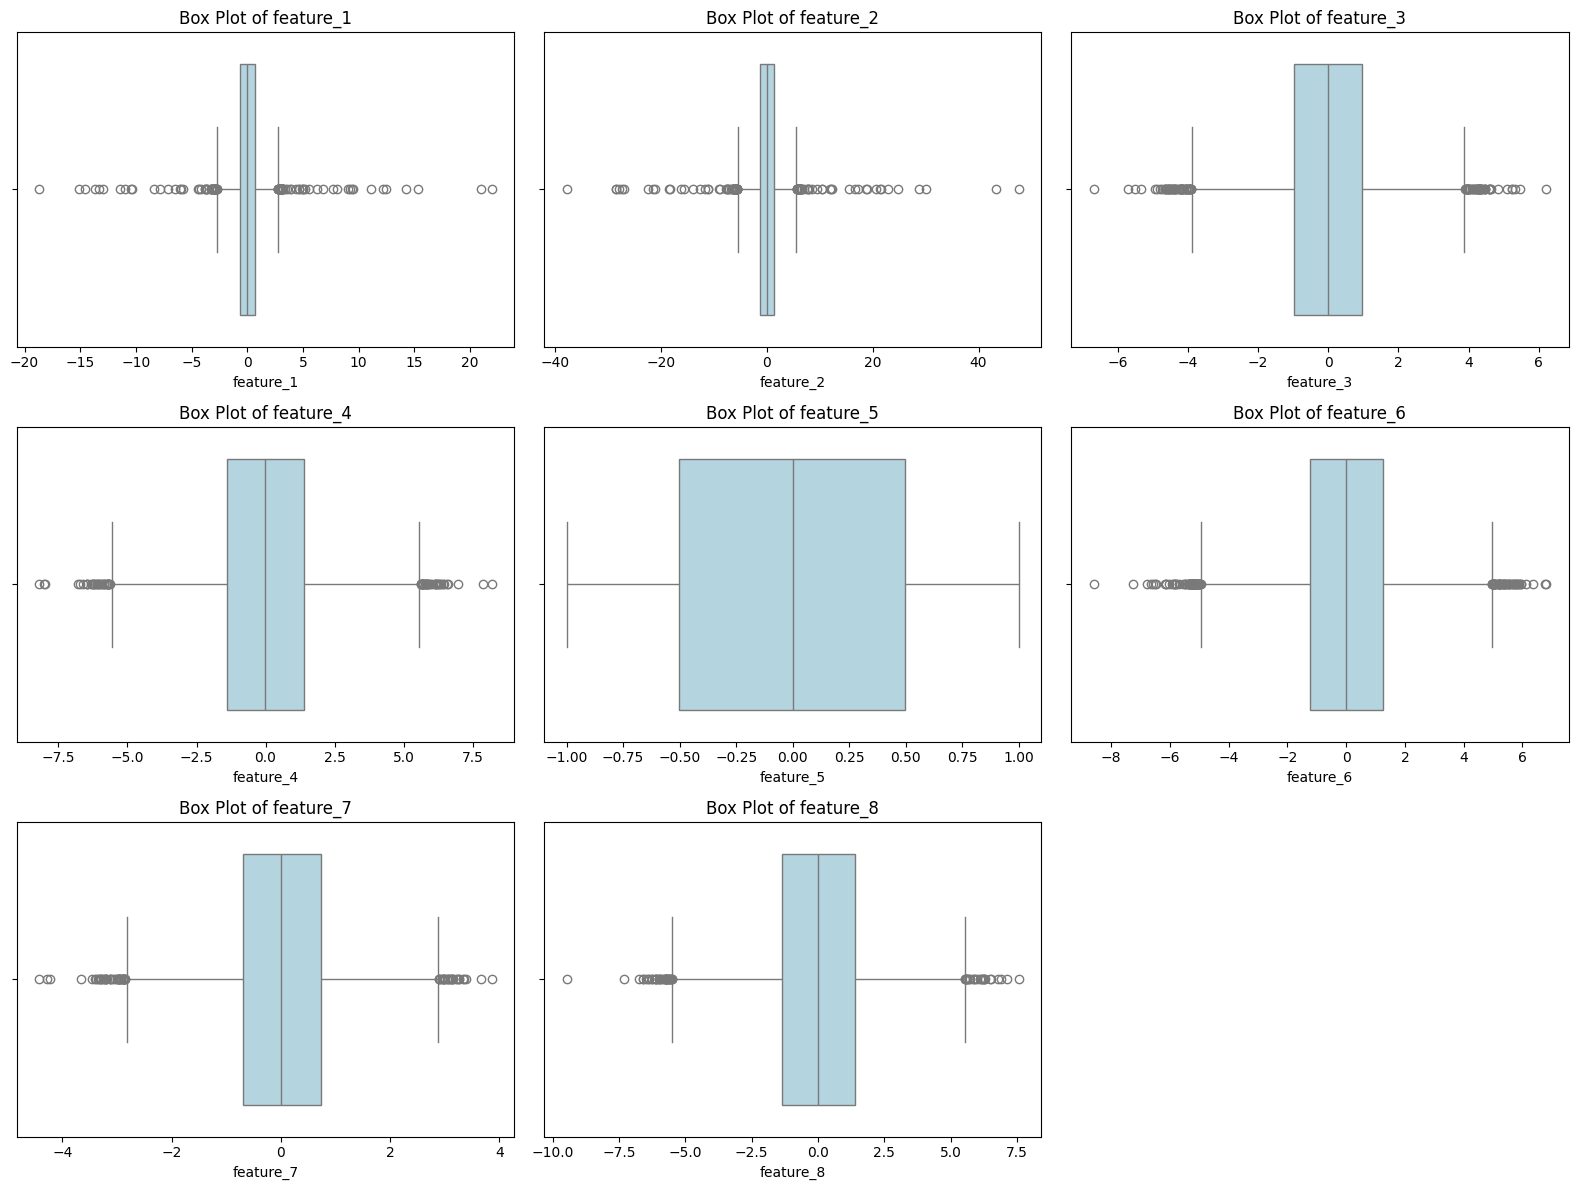

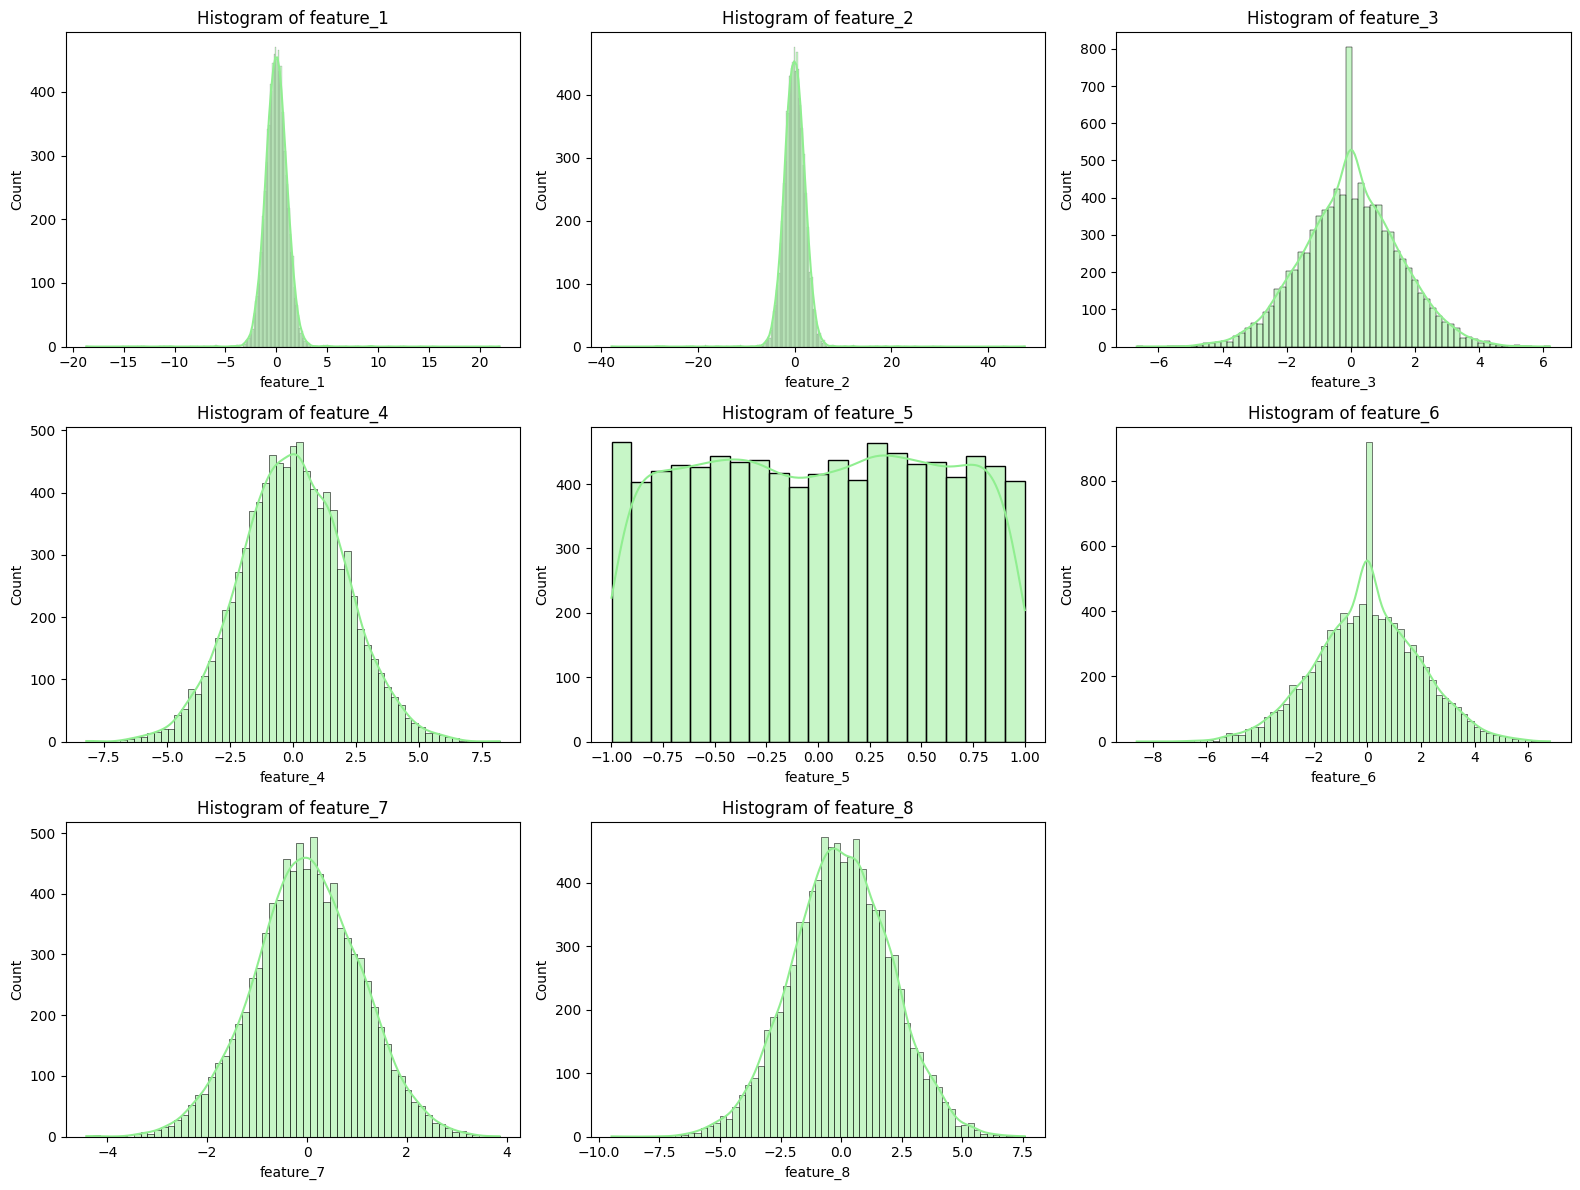

In [187]:
# Определяем числовые признаки
numerical_features = ['feature_1', 'feature_2', 'feature_3', 'feature_4', 
                      'feature_5', 'feature_6', 'feature_7', 'feature_8']

# Создание боксплотов для числовых признаков
plt.figure(figsize=(16, 12))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 3, i)  # Сетка 3x3, чтобы вместить все 8 признаков
    sns.boxplot(x=df[feature], color='lightblue')
    plt.title(f'Box Plot of {feature}')
plt.tight_layout()
plt.show()

# Создание гистограмм для числовых признаков
plt.figure(figsize=(16, 12))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 3, i)  # Сетка 3x3
    sns.histplot(df[feature], kde=True, color='lightgreen')
    plt.title(f'Histogram of {feature}')
plt.tight_layout()
plt.show()


In [188]:
from sklearn.cluster import KMeans
import numpy as np

# Выбор числовых признаков для кластеризации
numerical_features = ['feature_1', 'feature_2', 'feature_3', 'feature_4',
                      'feature_5', 'feature_6', 'feature_7', 'feature_8']
X = df[numerical_features]

# Применение K-Means для кластеризации
kmeans = KMeans(n_clusters=2, random_state=42)  # Предполагаем, что выбросы будут в одном кластере
kmeans.fit(X)

# Получение меток кластеров и центроидов
cluster_labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Расчет расстояний от каждой точки до её центроида
distances = []
for i in range(len(X)):
    cluster_idx = cluster_labels[i]
    centroid = centroids[cluster_idx]
    distance = np.linalg.norm(X.iloc[i] - centroid)
    distances.append(distance)

# Идентификация выбросов как точек с расстояниями выше определенного порога
outlier_threshold = np.percentile(distances, 95)  # Порог: 95-й перцентиль расстояний
outliers = df[distances > outlier_threshold]

# Вывод найденных выбросов
print("Outliers identified using K-Means Clustering:")
print(outliers)


Outliers identified using K-Means Clustering:
      feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  \
25     0.110923   0.360779  -0.082296   0.308622   0.308241  -5.190415   
75     0.821903   1.952366  -1.303700   1.803282   0.509935  -7.263078   
97     0.261055   0.276205  -0.730910   0.330969  -0.990998   5.368116   
113    2.463242   4.861781  -3.275780   5.682157  -0.965849  -1.950951   
125    2.190456   4.393793  -3.053114   3.433853  -0.873265  -4.201300   
...         ...        ...        ...        ...        ...        ...   
8779  -0.171496  -0.385438  -0.097315  -0.691949   0.985711  -5.075873   
8819   0.267475   0.193578  -1.070443  -0.118866   0.322253   3.921871   
8865   1.271900   2.520841  -1.516325   2.791530   0.763876  -5.093017   
8888  -0.068286  -0.584437   0.415628  -1.250130  -0.490509  -3.919137   
8891   0.530867   0.845902  -0.416650   0.275107   0.031269   5.887295   

      feature_7  feature_8     category_1 category_2  target  
25

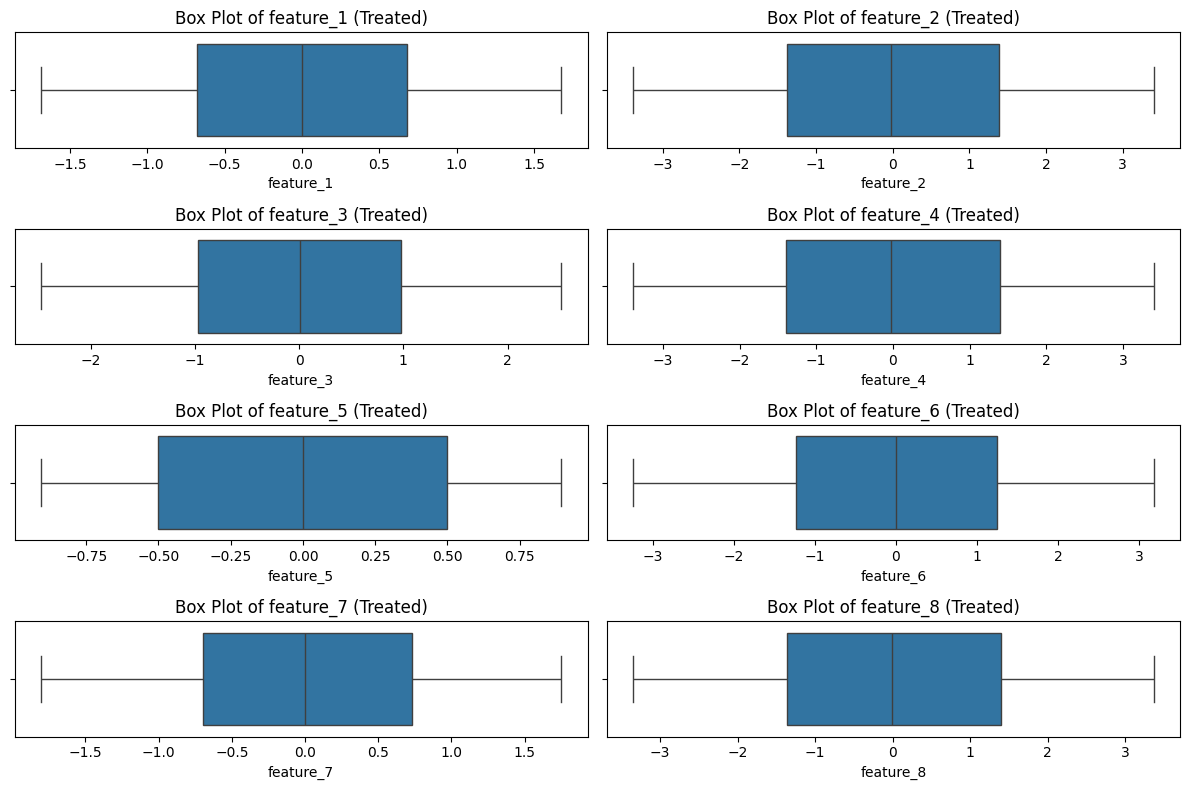

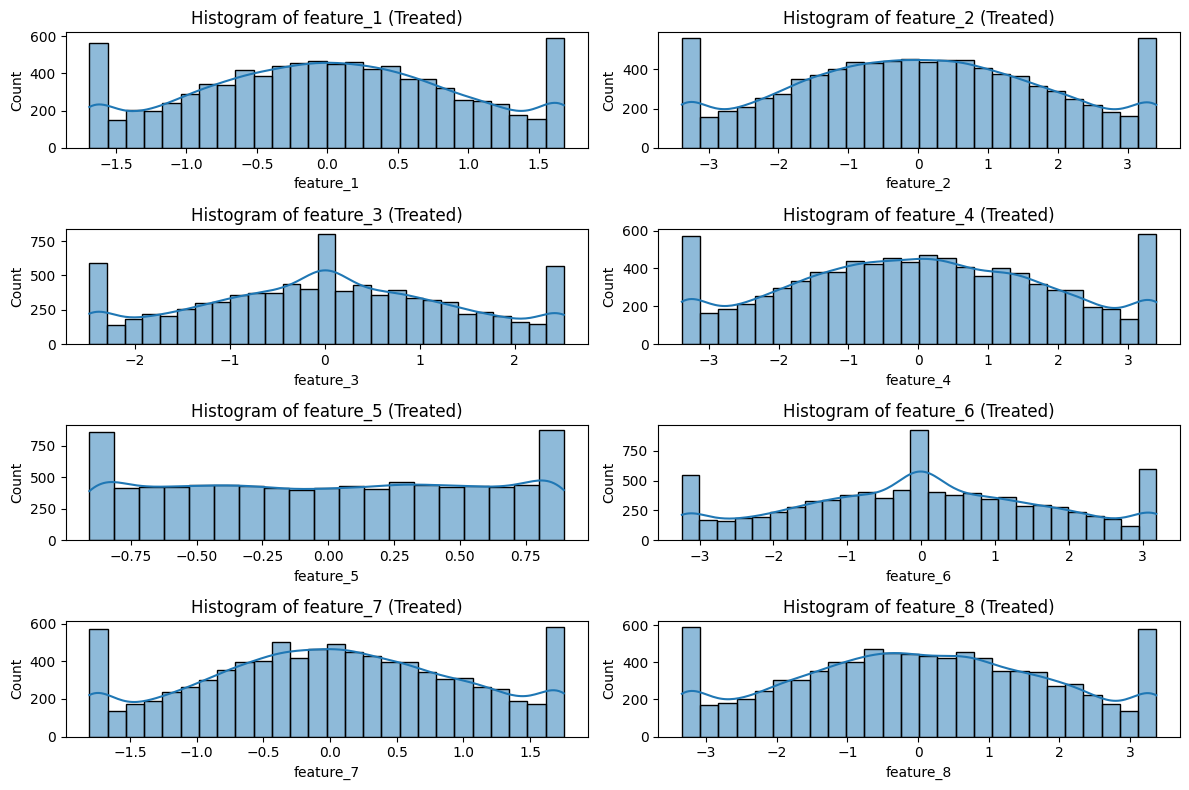

In [189]:
# Обработка выбросов с помощью clipping на исходных числовых признаках
numerical_features = ['feature_1','feature_2','feature_3','feature_4',
                      'feature_5','feature_6','feature_7','feature_8']
for feature in numerical_features:
    # Определение порогов для 5-го и 95-го перцентиля
    low_threshold = df[feature].quantile(0.05)
    high_threshold = df[feature].quantile(0.95)
    
    # Применение clipping для обработки выбросов
    df[feature] = df[feature].clip(lower=low_threshold, upper=high_threshold)

# Визуализация обновленных box plot для каждого признака
plt.figure(figsize=(12, 8))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(4, 2, i)  # Размещение графиков на одной строке
    sns.boxplot(x=df[feature])  # Построение boxplot для каждого признака
    plt.title(f'Box Plot of {feature} (Treated)')  # Заголовок для каждого графика
plt.tight_layout()  # Автоматическое распределение графиков
plt.show()

# Визуализация обновленных гистограмм для каждого признака
plt.figure(figsize=(12, 8))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(4, 2, i)  # Размещение графиков на одной строке
    sns.histplot(df[feature], kde=True)  # Построение гистограммы с KDE
    plt.title(f'Histogram of {feature} (Treated)')  # Заголовок для каждого графика
plt.tight_layout()  # Автоматическое распределение графиков
plt.show()


### 2.3 Feature scaling and normalization

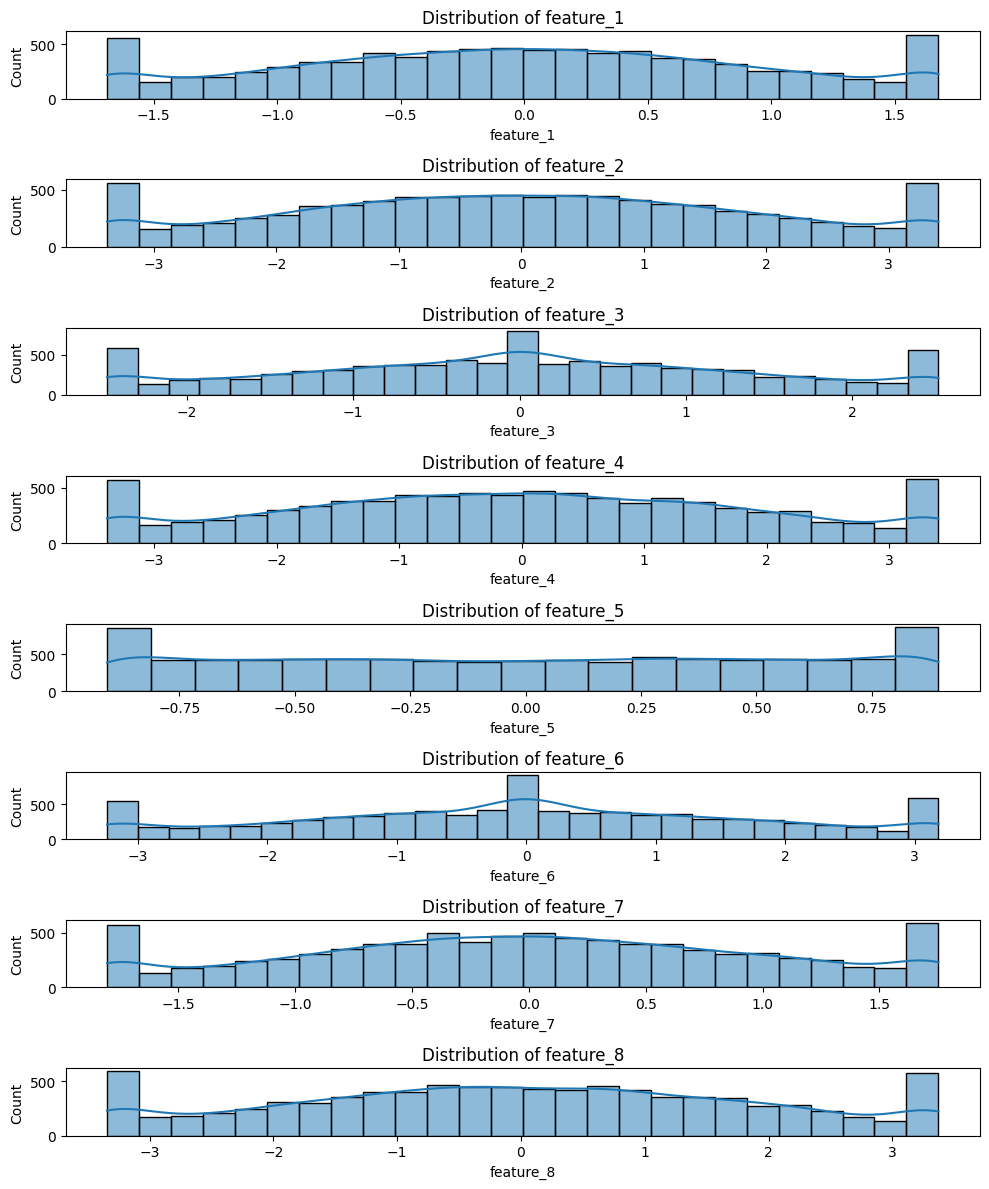

In [190]:
numerical_features = ['feature_1', 'feature_2', 'feature_3', 'feature_4',
                      'feature_5', 'feature_6', 'feature_7', 'feature_8']

# Set up subplots for each feature
fig, axes = plt.subplots(nrows=len(numerical_features), ncols=1, figsize=(10, 12))

# Plot histograms for each numerical feature
for i, feature in enumerate(numerical_features):
    sns.histplot(df[feature], ax=axes[i], kde=True)
    axes[i].set_title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()

In [191]:
from sklearn.preprocessing import MinMaxScaler

# Min-Max Scaling
scaler = MinMaxScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Display normalized or scaled dataset
df.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,category_1,category_2,target
0,0.649405,0.667031,0.366397,0.621267,0.939085,0.160301,0.141803,0.164049,Above Average,Region C,1
1,0.460704,0.489083,0.497220,0.558027,0.894542,0.115279,0.130803,0.208703,Below Average,Region A,0
2,0.694271,0.703642,0.343262,0.750219,0.364607,0.808968,0.841987,0.721702,High,Region C,1
3,0.954401,0.889556,0.003549,0.888826,0.993084,1.000000,1.000000,1.000000,High,Region B,1
4,0.432208,0.424648,0.611470,0.433470,0.842324,0.537269,0.770438,0.438094,Below Average,Region C,0


Statistics before normalization:
         feature_1    feature_2    feature_3    feature_4    feature_5  \
count  9000.000000  9000.000000  8600.000000  9000.000000  9000.000000   
mean      0.000427     0.003349     0.003235    -0.008481    -0.002177   
std       1.241318     2.508324     1.542901     2.061784     0.577415   
min     -18.665400   -37.852816    -6.676680    -8.190124    -0.999791   
25%      -0.680062    -1.382610    -1.022085    -1.399928    -0.502614   
50%      -0.003938    -0.016698     0.005196    -0.019541     0.001695   
75%       0.680513     1.380228     1.038571     1.394151     0.497004   
max      21.934496    47.603454     6.203055     8.189001     0.999914   

         feature_6    feature_7    feature_8  
count  8500.000000  9000.000000  9000.000000  
mean     -0.006447     0.000592     0.003348  
std       1.981615     1.075064     2.043643  
min      -8.590782    -4.422265    -9.474989  
25%      -1.329040    -0.700078    -1.356620  
50%      -0.003137

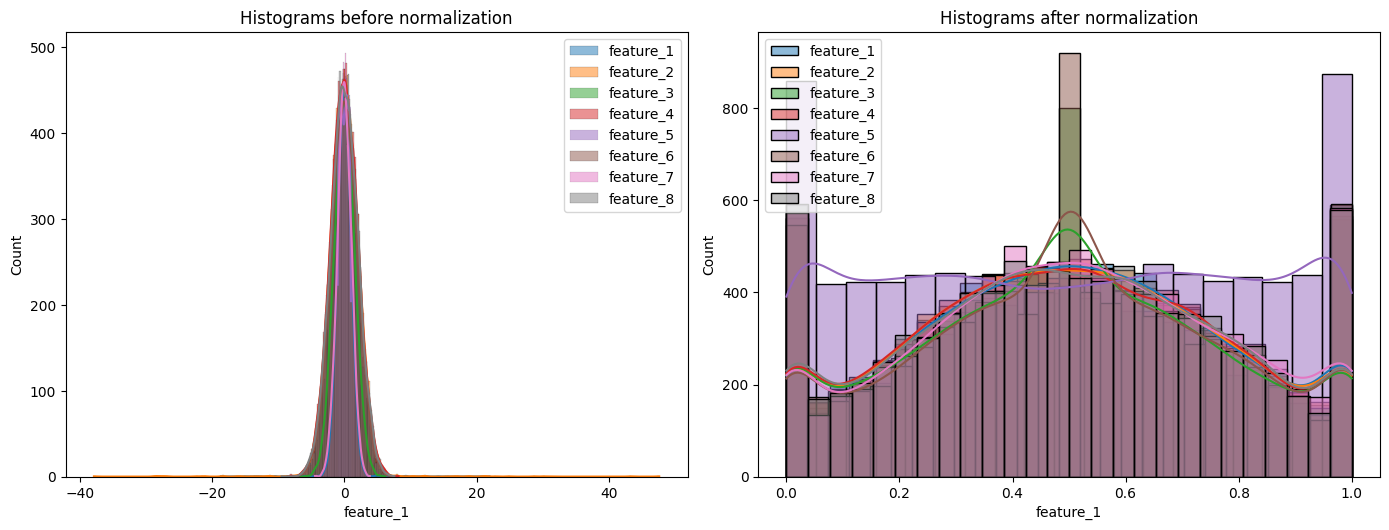

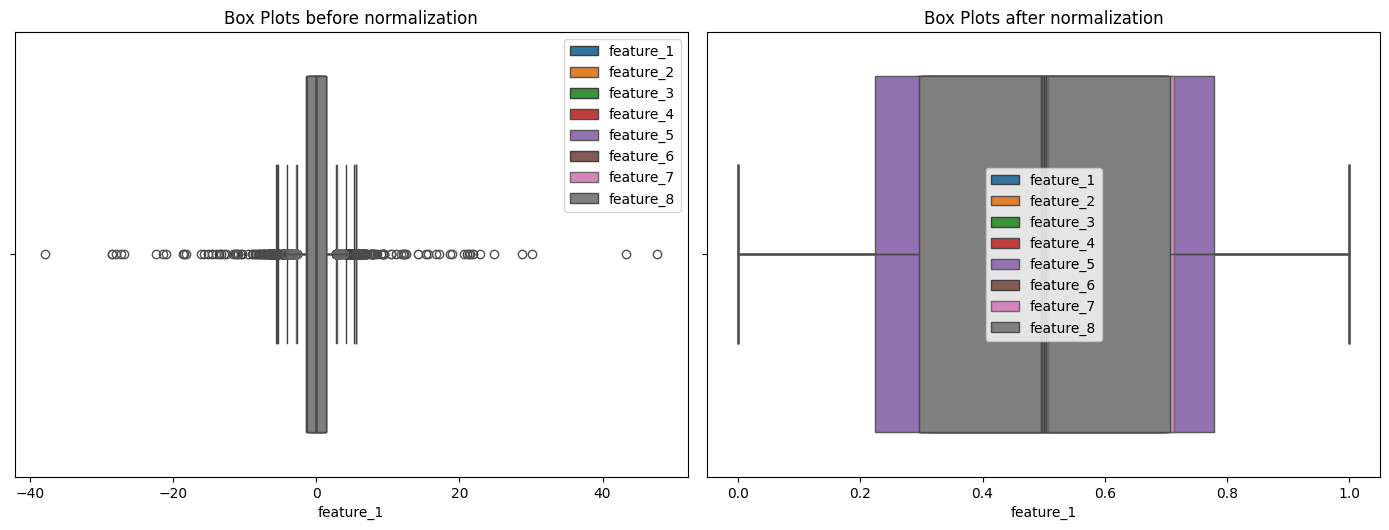

In [192]:
import matplotlib.pyplot as plt
import seaborn as sns

# Рассчитываем статистику до и после нормализации
print("Statistics before normalization:")
print(df_raw[numerical_features].describe())  # Прежний датасет df_raw, до нормализации

print("\nStatistics after normalization:")
print(df[numerical_features].describe())  # Датасет после нормализации df

# Визуализация: Histograms до и после нормализации
plt.figure(figsize=(14, 10))

# До нормализации
plt.subplot(2, 2, 1)
for feature in numerical_features:
    sns.histplot(df_raw[feature], kde=True, label=feature)
plt.title("Histograms before normalization")
plt.legend()

# После нормализации
plt.subplot(2, 2, 2)
for feature in numerical_features:
    sns.histplot(df[feature], kde=True, label=feature)
plt.title("Histograms after normalization")
plt.legend()

plt.tight_layout()
plt.show()

# Визуализация: Box plots до и после нормализации
plt.figure(figsize=(14, 10))

# До нормализации
plt.subplot(2, 2, 1)
for feature in numerical_features:
    sns.boxplot(x=df_raw[feature], label=feature)
plt.title("Box Plots before normalization")
plt.legend()

# После нормализации
plt.subplot(2, 2, 2)
for feature in numerical_features:
    sns.boxplot(x=df[feature], label=feature)
plt.title("Box Plots after normalization")
plt.legend()

plt.tight_layout()
plt.show()


In [193]:
df.to_csv("cleaned_dataset.csv", index=False)